### In this notebook, we display wordclouds using a stopwrod list composed of a combination from stopword dictionaries via spaCy, WordCloud, and NLTK packages. 
* Three wordclouds are displayed: a full dataset wordcloud, followed by a positive sentiment only wordcloud, and a negative sentiment only wordcloud.
* The only further customization of the stopwords list is the exclusion of the word 'not'.

In [12]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

## Some EDA

In [13]:
df = pd.read_csv('IMDB Dataset.csv')

In [14]:
# Extend width of dataframe view
pd.options.display.max_colwidth = 100

In [15]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked....,positive
1,A wonderful little production. <br /><br />The filming technique is very unassuming- very old-ti...,positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...",positive
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei off...",positive


### Review examples from each sentiment.

In [16]:
print(df['review'][3])
print('')
print('Sentiment:',df['sentiment'][3])

Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.

Sentiment: negative


In [17]:
print(df['review'][1])
print('')
print('Sentiment:',df['sentiment'][1])

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.



In [18]:
# Check for balanced dataset
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

## Pre-processing: Tokenize, Stopwords, Lemmatize, etc.

#### Remove html coding

In [19]:
df['review'] = df['review'].str.replace('<.*?>','')

#### Make everything lower case

In [20]:
df['review'] = df['review'].str.lower()

#### Remove stop words

In [21]:
import spacy
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words
# # After seeing the word counts, update stop words
# sp.Defaults.stop_words |= {'movie', 'film', 'like'}

In [22]:
# Import custom list and merge with spaCy list.
import pickle
with open('wordcloud_sw.data', 'rb') as file:
    load_f = pickle.load(file)

In [23]:
a = list(all_stopwords)
b = list(load_f)
c = [i for i in b if i not in a]
d = [j for j in a if j not in b] 

In [24]:
master_stop = a+b+c+d

In [25]:
len(master_stop)

836

In [26]:
# Convert set to list for the purpose of removing duplicates
master_set = set(master_stop)
master_set.remove('not')

In [27]:
len(master_set)

417

In [28]:
# Apply function to remove stopwords
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (master_set)]))

#### Remove all puncuation and special characters

In [19]:
df['review'] = df['review'].str.replace('[^\w\s]','')

#### Tokenize & lemmatize

In [20]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [21]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [22]:
df['lemma_review'] = df.review.apply(lemmatize_text)

In [23]:
df['review'][0]

'reviewers mentioned watching 1 oz episode hooked right exactly happened methe thing struck oz brutality unflinching scenes violence set right word go trust me not faint hearted timid pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy not high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements far awayi main appeal fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz mess around episode saw struck nasty surreal ready it watched more developed taste oz got accustomed high levels graphic violence not violence injustice crooked guards wholl sold nickel inmates wholl kill order away it mannered middle class inmates turned prison bitches lack street skills prison experience

In [24]:
print(df['lemma_review'][0])

['reviewer', 'mentioned', 'watching', '1', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened', 'methe', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'go', 'trust', 'me', 'not', 'faint', 'hearted', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'not', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'moreso', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'far', 'awayi', 'main', 'appeal', 'fact', 'go', 'show', 'dare', 'forget', 'pretty', 'picture', 'painted', 'mainstream', 'audience', 'forget', 'charm', 'forget', 'romanceoz', 'mess', 'around', 'episode', 'saw',

In [25]:
# Get word counts and make sure stopwords didnt re-enter the data after lemmatizing
cloudcount = dict(df.lemma_review.explode().value_counts())
cleancloud = dict((key, value) for key, value in cloudcount.items() if key not in master_set)
{k: cleancloud[k] for k in list(cleancloud)[:15]}

{'movie': 98938,
 'film': 89752,
 'not': 59498,
 'time': 29354,
 'good': 28596,
 'character': 27570,
 'story': 24210,
 'scene': 20696,
 'people': 17973,
 'great': 17799,
 'bad': 17646,
 'way': 16509,
 'thing': 16076,
 'think': 15078,
 'life': 14384}

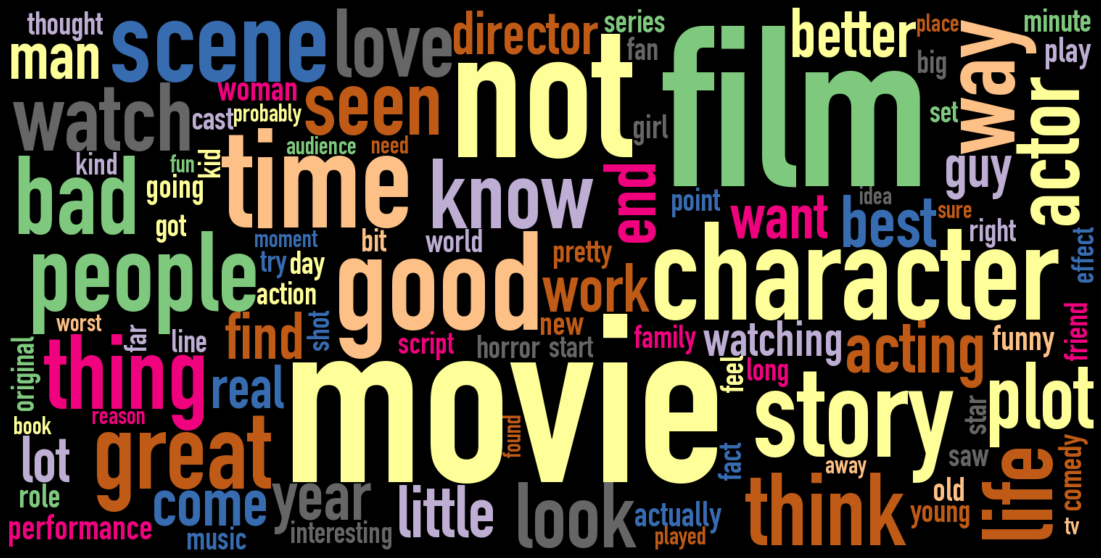

In [26]:
wordcloud = WordCloud(width=1500, height=750, max_words=100, background_color="black", max_font_size=325,
                      colormap='Accent', font_path='/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf').generate_from_frequencies(cleancloud)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('full_set_cloud.png')
plt.show()

In [27]:
pos_df = df[df['sentiment'] == 'positive']
neg_df = df[df['sentiment'] == 'negative']

In [28]:
pos_cloud = dict(pos_df.lemma_review.explode().value_counts())
pos_clean = dict((key, value) for key, value in pos_cloud.items() if key not in master_set)
{k: pos_clean[k] for k in list(pos_clean)[:10]}

{'film': 47874,
 'movie': 43098,
 'not': 27843,
 'time': 15177,
 'good': 14409,
 'story': 13638,
 'character': 13629,
 'great': 12690,
 'scene': 9688,
 'life': 9134}

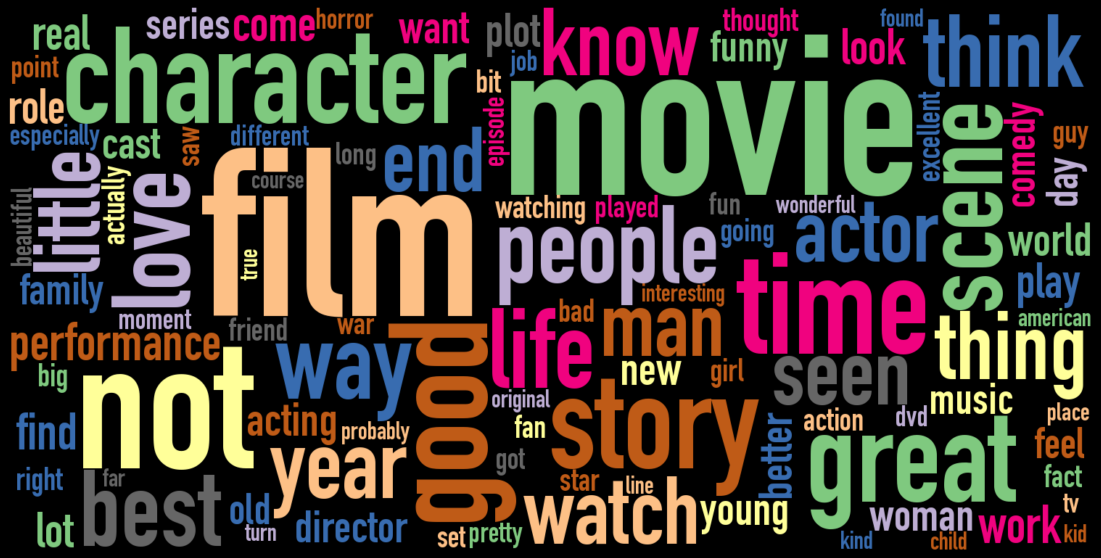

In [29]:
wordcloud = WordCloud(width=1500, height=750, max_words=100, background_color="black", max_font_size=325,
                      colormap='Accent', font_path='/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf').generate_from_frequencies(pos_clean)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('pos_cloud.png')
plt.show()

In [30]:
neg_cloud = dict(neg_df.lemma_review.explode().value_counts())
neg_clean = dict((key, value) for key, value in neg_cloud.items() if key not in master_set)
{k: neg_clean[k] for k in list(neg_clean)[:10]}

{'movie': 55840,
 'film': 41878,
 'not': 31655,
 'good': 14187,
 'time': 14177,
 'bad': 14068,
 'character': 13941,
 'scene': 11008,
 'story': 10572,
 'people': 9336}

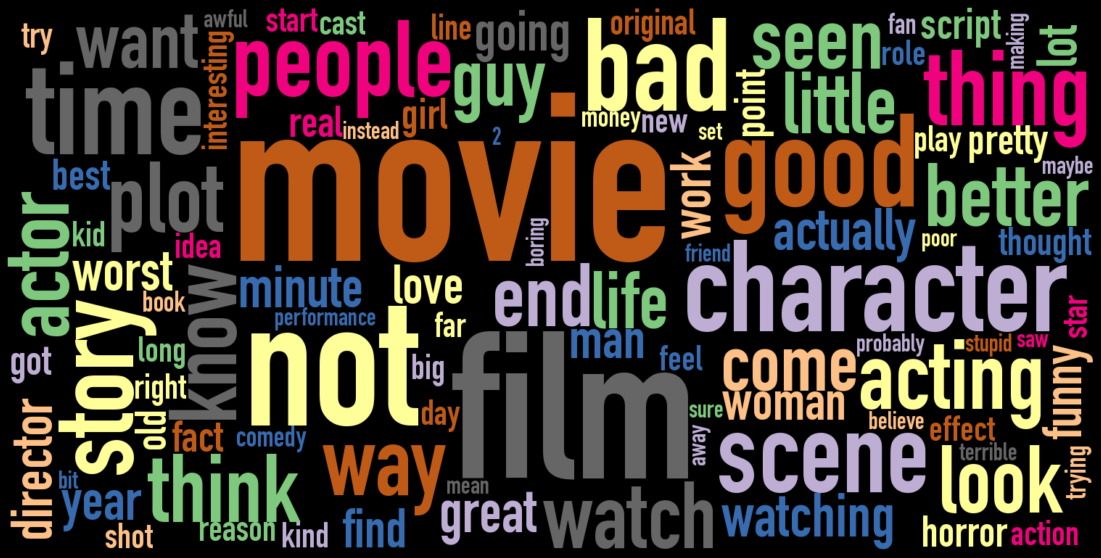

In [31]:
wordcloud = WordCloud(width=1500, height=750, max_words=100, background_color="black", max_font_size=325,
                      colormap='Accent', font_path='/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf').generate_from_frequencies(neg_clean)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('neg_cloud.png')
plt.show()